In [ ]:
# A simple conversion tool through Langgraph practise

# I earn in usd earn 8 percent intrest and see whats that in inr given a fixed inr value

In [1]:
from typing import TypedDict   #Type hint

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float

In [2]:
def calc_total(state: PortfolioState) -> PortfolioState:  #state as input and output
    state['total_usd'] = state['amount_usd'] * 1.08    # 8 percent fixed return rate
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd'] * 87    #usd to inr
    return state

In [4]:
#building graph
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_node", calc_total)   #My nodes
builder.add_node("convert_to_inr_node", convert_to_inr)

#**************************
builder.add_edge(START, "calc_total_node")  # my edges like tesnorflow seq api
builder.add_edge("calc_total_node", "convert_to_inr_node")
builder.add_edge("convert_to_inr_node", END)   #graph ends

graph = builder.compile()

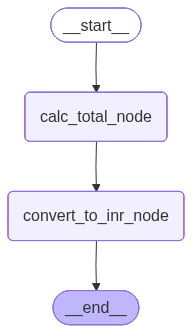

In [11]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
graph.invoke({"amount_usd":1000})

{'amount_usd': 1000, 'total_usd': 1080.0, 'total_inr': 93960.0}